# Atomic models

abTEM uses the Atomic Simulation Environment [(ASE)](https://wiki.fysik.dtu.dk/ase/) for creating atomic models. ASE is a set of tools and Python modules for setting up, manipulating, visualizing and analyzing atomistic simulations. It is used in conjunction with other simulation codes such as GPAW for running DFT simulations. Here we will introduce the features of ASE needed for image simulations, the ASE documentation provides a general introduction.

## Atoms
The Atoms object is a collection of atoms. Here is how to define a $\mathrm{N}_2$ molecule by directly specifying the position of two nitrogen atoms in units of Angstrom:

In [1]:
from ase import Atoms
n2 = Atoms('2N', positions=[(0., 0., 0.), (0., 0., 1.10)], cell=[2, 2, 2])

abTEM uses just the positional coordinates, atomic numbers and unit cell properties for creating electrostatic potentials.

In [2]:
n2.positions

array([[0. , 0. , 0. ],
       [0. , 0. , 1.1]])

In [3]:
n2.numbers

array([7, 7])

In [4]:
n2.cell

Cell([2.0, 2.0, 2.0])

## Import

ASE can import all the common atomic structure formats, see a full list [here](https://wiki.fysik.dtu.dk/ase/ase/io/io.html). Below we import a `.cif`-file defining a unit cell of Strontium Titanate, SrTiO3.

In [3]:
from ase.io import read
srtio3 = read('srtio3.cif')

## Visualize

The simplest way to visualize the atoms is the `view` function:

In [6]:
from ase.visualize import view
view(srtio3)

The atomic structure can also visualized inline in a Jupyter Notebook using the `plot_atoms` function. This function shows a 2d projection of the structure perpendicular to the specified plane. For example:

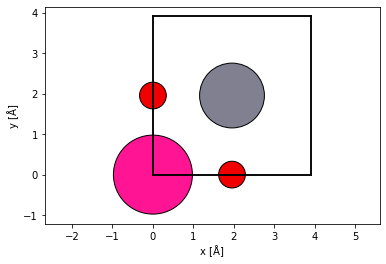

In [5]:
from abtem.plot import show_atoms

show_atoms(srtio3, plane='xy')

## Manipulation

abTEM always assumes that imaging electrons propagate along the $z$-axis in the direction from negative to positive. Hence, to choose the imaging zone axis, we need to manipulate the atoms so they are properly aligned.

ASE has a range of tools for manipulating imported structures, for example, the `surface` function, which is used for creating a surface (aligned with the $z$-axis) with a given set of miller indices.

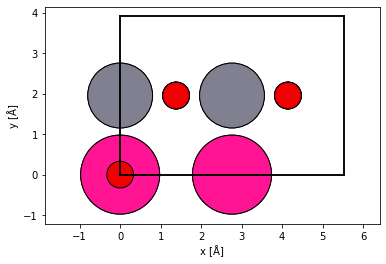

In [9]:
from ase.build import surface

srtio3_110 = surface(srtio3, indices=(1, 1, 0), layers=4, periodic=True)

show_atoms(srtio3_110, plane='xy')

In [10]:
srtio3_110.cell

Cell([5.522503961066936, 3.905, 11.04500792213387])

Simulations may require a larger crystal, to repeat the atoms by 2 in the $x$- and 3 $y$-direction (and 1 in the $z$-direction) we can write:

In [11]:
srtio3_110 *= (2, 3, 3)

Next, we center the atoms in the cell and add 3 Angstrom of vacuum at the entrance- and exit-plane along the $z$-axis.

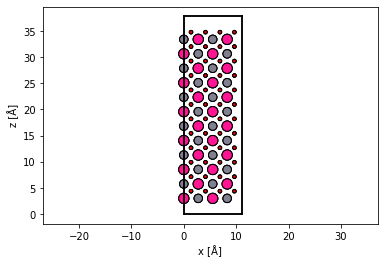

In [12]:
srtio3_110.center(axis=2, vacuum=3)

show_atoms(srtio3_110, plane='xz')

The manipulated structure can be exported 

In [13]:
from ase.io import write

write('srtio3_110.cif', srtio3_110)

## Procedural creation

ASE also includes modules for procedurally generating special structures such as [carbon nanotubes](https://wiki.fysik.dtu.dk/ase/ase/build/build.html#nanotubes) and [nanoparticles](https://wiki.fysik.dtu.dk/ase/ase/cluster/cluster.html). Here we create a type $(6,0)$ nanotube. 

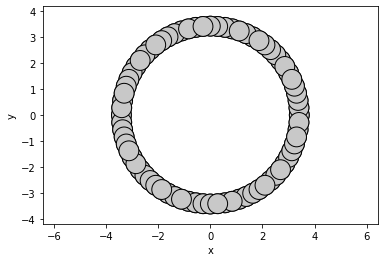

In [19]:
from ase.build import nanotube
cnt = nanotube(6, 4, length=1)

show_atoms(cnt)

As shown above, the optical axis is along the length of the nanotube. To rotate the nanotube we use the [rotate method](https://wiki.fysik.dtu.dk/ase/ase/atoms.html?highlight=atoms#ase.Atoms.rotate).

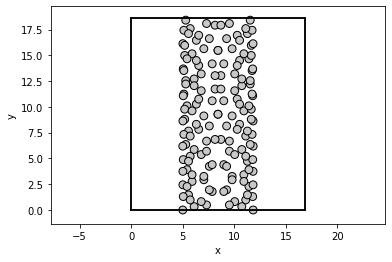

In [20]:
cnt.rotate(-90, 'x', rotate_cell=True)
cnt.center(vacuum=5, axis=(0,1))

show_atoms(cnt)

## Bravais cell

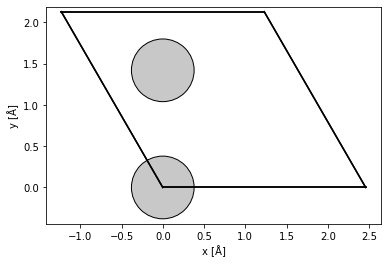

In [6]:
from ase.lattice.hexagonal import HexagonalFactory

class GrapheneFactory(HexagonalFactory):
    'A factory for creating graphene lattices.'
    xtal_name = 'graphene'
    bravais_basis = [[0, 0, 0], [1.0 / 3.0, 2.0 / 3.0, 0]]

Graphene = GrapheneFactory()

atoms = Graphene('C', latticeconstant={'a':2.46,'c':6})
atoms.center(axis=2, vacuum=1)

show_atoms(atoms)

abTEM requires orthogonal unit cells. 

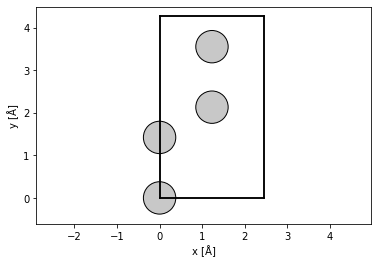

In [7]:
from abtem.structures import orthogonalize

atoms = orthogonalize(atoms)

show_atoms(atoms)

In [9]:
from ase.io import write
write('graphene.cif', atoms)